In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#1. 데이터 파악
data1 = pd.read_excel("종설 과제.xlsm", sheet_name="1st")
data1 = data1[["Discipline","Weight(MT)", "LCG(m)", "TCG(m)"]]
table1 = pd.pivot_table(data1, values=["Weight(MT)", "LCG(m)", "TCG(m)"], 
                       index= "Discipline", aggfunc={"Weight(MT)":np.sum,
                                                    "LCG(m)":[min, max, np.mean], 
                                                     "TCG(m)":[min, max, np.mean]})
data2 = pd.read_excel("종설 과제.xlsm", sheet_name="Final")
data2 = data2[["Discipline","Weight(MT)", "LCG(m)", "TCG(m)"]]
table2 = pd.pivot_table(data2, values=["Weight(MT)", "LCG(m)", "TCG(m)"], 
                       index= "Discipline", aggfunc={"Weight(MT)":np.sum,
                                                    "LCG(m)":[min, max, np.mean], 
                                                     "TCG(m)":[min, max, np.mean]})

table1.head()
#print(table2.head())

LCG(m)                    TCG(m)                    Weight(MT)
               max        mean    min    max      mean    min          sum
Discipline                                                                
A           248.00  238.450870  72.21   8.00 -1.851304 -16.00   361.704560
E           362.90  172.411321  77.44  27.70 -1.336607 -27.70   635.924000
M           117.50   75.067507  -0.40  24.30  3.921397 -18.30  4137.841370
O           391.56  197.247416  -2.78  21.04  0.404779  -3.29  7306.589206
P           381.50  204.959878  72.70  27.00  0.060244 -26.75   730.841560

In [4]:
print(data1.head())
print(data2.head())

  Discipline   Weight(MT)   LCG(m)  TCG(m)
0          S   1751.45558    4.869   0.001
1          S   9572.29820   61.692   0.222
2          S  30478.42773  218.869  -0.019
3          S   2417.13087  367.724   0.003
4          S    781.71525  245.502  -0.051
  Discipline   Weight(MT)    LCG(m)    TCG(m)
0          S   1722.64263    4.6815  0.000882
1          S   9288.75080   61.0045  0.249972
2          S  28444.28798  220.5565 -0.022610
3          S   2522.53386  367.5865  0.002910
4          S    936.42525  245.6145 -0.052428


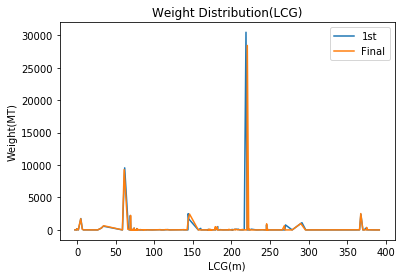

In [5]:
# 2. LCG에 따른 Weight 분포
sorted_data1 = data1.sort_values(by=["LCG(m)"])
sorted_data2 = data2.sort_values(by=["LCG(m)"])

x_value1 = [float(i) for i in sorted_data1.iloc[:, 2]] # LCG값
y_value1 = [float(i) for i in sorted_data1.iloc[:, 1]] # Weight값
x_value2 = [float(i) for i in sorted_data2.iloc[:, 2]] # LCG값
y_value2 = [float(i) for i in sorted_data2.iloc[:, 1]] # Weight값

plt.plot(x_value1, y_value1, label="1st")
plt.plot(x_value2, y_value2, label="Final")
plt.title("Weight Distribution(LCG)")
plt.xlabel("LCG(m)")
plt.ylabel("Weight(MT)")
plt.legend()

Text(0,0.5,'Weight(MT)')

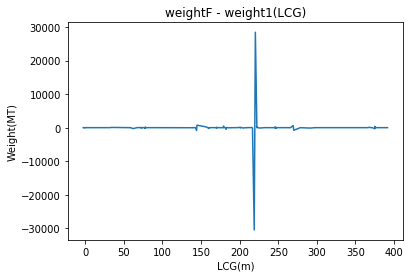

In [6]:
# 2.1 LCG에 따른 Weight diff 파악
y_value3 = [first - second for first, second in zip(y_value2, y_value1)] # weight차이가 심한 곳.
plt.plot(x_value1, y_value3)
plt.title("weightF - weight1(LCG)")
plt.xlabel("LCG(m)")
plt.ylabel("Weight(MT)")

In [7]:
data1.describe()
data2.describe()

,Weight(MT),LCG(m),TCG(m)
count,290.000000,290.000000,290.000000
mean,199.459386,167.602184,0.988063
std,1775.226171,94.101100,8.358439
min,0.000000,-2.792500,-27.871000
25%,0.506138,78.337125,0.000000
50%,2.771000,170.100000,0.000000
75%,18.006215,244.493750,0.873722
max,28444.287980,391.547500,31.356400


Text(0,0.5,'Weight(MT)')

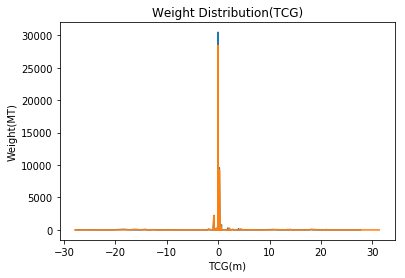

In [12]:
# 3. TCG에 따른 Weight 분포
sorted_data_tcg1 = data1.sort_values(by=["TCG(m)"])
sorted_data_tcg2 = data2.sort_values(by=["TCG(m)"])

yt_value1 = [float(i) for i in sorted_data_tcg1.iloc[:, 1]] # TCG값
xt_value1 = [float(i) for i in sorted_data_tcg1.iloc[:, 3]] # Weight값
yt_value2 = [float(i) for i in sorted_data_tcg2.iloc[:, 1]] # TCG값
xt_value2 = [float(i) for i in sorted_data_tcg2.iloc[:, 3]] # Weight값

plt.plot(xt_value1, yt_value1)
plt.plot(xt_value2, yt_value2)
plt.title("Weight Distribution(TCG)")
plt.xlabel("TCG(m)")
plt.ylabel("Weight(MT)")

Text(0,0.5,'Weight(MT)')

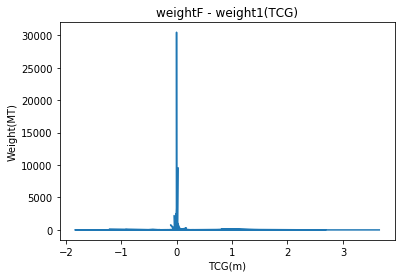

In [14]:
# 3.1 TCG에 따른 Weight diff 파악
yt_value3 = [first - second for first, second in zip(xt_value2, xt_value1)] # weight차이가 심한 곳.
plt.plot(xt_value3, yt_value1)
plt.title("weightF - weight1(TCG)")
plt.xlabel("TCG(m)")
plt.ylabel("Weight(MT)")

Text(0,0.5,'Weight Diff(MT)')

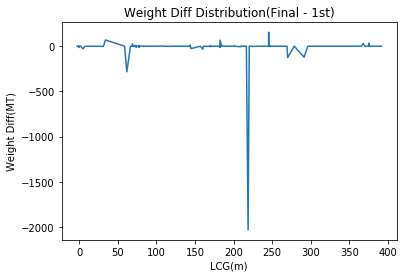

In [10]:
# 3.2 Weight diff를 재설정.(LCG)
sorted_data_w1 = data1.sort_values(by=["Weight(MT)"])
sorted_data_w2 = data2.sort_values(by=["Weight(MT)"])
sorted_data_w1["diff"] = [w2 - w1 for w1, w2 in zip(sorted_data_w1["Weight(MT)"], sorted_data_w2["Weight(MT)"])]
sorted_data = sorted_data_w1.sort_values(by=["LCG(m)"])
plt.plot(sorted_data["LCG(m)"], sorted_data["diff"])
plt.title("Weight Diff Distribution(Final - 1st)")
plt.xlabel("LCG(m)")
plt.ylabel("Weight Diff(MT)")

Text(0,0.5,'Weight Diff(MT)')

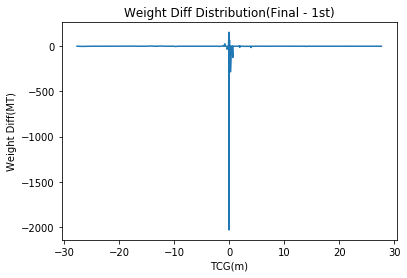

In [15]:
# 4.2 Weight diff를 재설정.(TCG)
sorted_data_w1["diff"] = [w2 - w1 for w1, w2 in zip(sorted_data_w1["Weight(MT)"], sorted_data_w2["Weight(MT)"])]
sorted_data_t = sorted_data_w1.sort_values(by=["TCG(m)"])
plt.plot(sorted_data_t["TCG(m)"], sorted_data_t["diff"])
plt.title("Weight Diff Distribution(Final - 1st)")
plt.xlabel("TCG(m)")
plt.ylabel("Weight Diff(MT)")